## 구글 코랩(Colab, Colaboratory)


* 구글에서 교육 및 과학 연구를 목적으로 개발한 도구로 2017년 무료 공개
* 웹 브라우저에서 직접 파이썬 코드를 작성하고 실행할 수 있게 해주는 무료 주피터 노트북 환경
*   구글 드라이브와 연동되어 데이터 접근이 쉬움
* 구글의 클라우드를 사용하므로 별도의 설정없이 라이브러리 사용이 쉬움
* GPU와 TPU 사용을 지원하므로 머신러닝(딥러닝) 프로젝트에 매우 유용



### 사용법


1. 구글계정으로 로그인 : https://colab.research.google.com/  

    *  코랩 제목 설정 : .ipynb 파일(Jupyter Notebook 파일)
        * Jupyter Notebook은 대화형 컴퓨팅 환경을 제공하는 오픈 소스 웹 응용 프로그램
    *   메뉴 : 파일, 런타임(런타임 유형 변경 : T4 GPU)
    *   목차, 검색, 파일, 코드 스니펫(snippet)

2. 텍스트 셀 작성 및 편집 : 마크다운(Markdown) 문법으로 작성

3. 코드 셀 작성 및 실행

2. 노트 열기/저장 : Google Drive, GitHub






In [1]:
# 구글 드라이브와 연동
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# GitHub Clone
!git clone -l -s https://github.com/nniceko/Image-processing.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 148 (delta 19), reused 0 (delta 0), pack-reused 98 (from 1)
Receiving objects: 100% (148/148), 38.13 MiB | 20.40 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/cloned-repo
 연습10장.ipynb				 연습3-5.ipynb	      연습6-4.ipynb
'연습11장(11-1, 11-2, 11-3_New).ipynb'	 연습3-6.ipynb	      연습6-5.ipynb
 연습11-3.ipynb				 연습3-7.ipynb	      연습6-6.ipynb
 연습1-1.ipynb				 연습3-8.ipynb	      연습7-1.ipynb
 연습12장.ipynb				 연습3-9.ipynb	      연습7-2.ipynb
 연습13-1.ipynb				 연습4-1.ipynb	      연습7-3.ipynb
 연습13-2.ipynb				 연습4-2.ipynb	      연습7-4.ipynb
 연습13-3.ipynb				 연습4-3.ipynb	      연습7-5.ipynb
 연습13-4.ipynb				 연습4-4.ipynb	      연습7-6.ipynb
 연습13-5.ipynb				 연습4-5.ipynb	      연습8-1.ipynb
 연습2-1.ipynb				 연습4-6.ipynb	      연습8-2.ipynb
 연습2-2.ipynb				 4장-연습문제.ipynb   연습8-3.ipynb
 연습2-3.ipynb				 연습5-1.ipynb	      연습8-4.ipynb
 

### OpenCV 설치

In [3]:
# Colab에 이미 설치된 라이브러리는 바로 import 가능
import numpy as np

In [4]:
# 필요한 라이브러리는 별도 설치 후 import: !와 Shell 명령어 사용
!pip install opencv-contrib-python

In [5]:
import cv2

### 이미지 보기

In [6]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/soccer.jpg')   # Colab 저장소, 종료 뒤 사라짐. 다시 업로드 필요
#img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/CVintro/data/lena.jpg') # 구글 드라이브 저장소

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

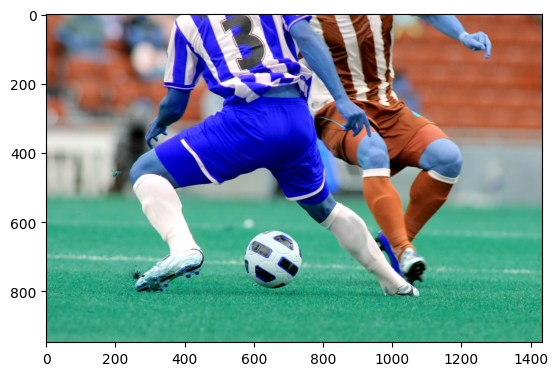

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

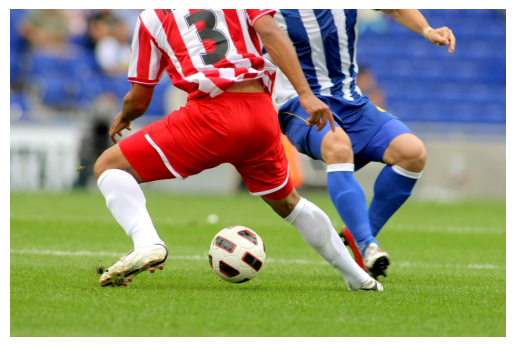

In [8]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(imgRGB)
plt.show()

### 웹 캠 연결 및 캡처하기 : 코드 스니펫 참조
camera capture

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

### Interaction in Colab

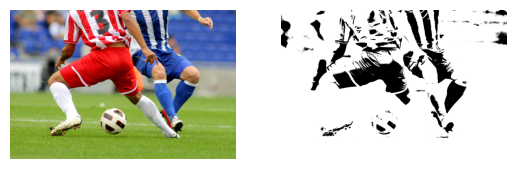

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh1 = 120 # @param {type:"slider", min:1, max:254, step:1}
thresh2 = 120 # @param {type:"integer", min:1, max:254}
bImage = cv2.inRange(img_gray, thresh1, 255) # 특정 영역을 추출, 범위 내는 255, 그 외는 0으로

fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(imgRGB)
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(bImage, "gray")
ax2.axis("off")

plt.show()